<a href="https://colab.research.google.com/github/Ashishat404/Data-Science/blob/main/Anomaly_Detection_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load Normal Data (Digits) and Anomaly Data (Clothes)
(x_train, _), (x_test_normal, _) = tf.keras.datasets.mnist.load_data()
(_, _), (x_test_anomaly, _) = tf.keras.datasets.fashion_mnist.load_data()

# 2. Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test_normal = x_test_normal.astype('float32') / 255.
x_test_anomaly = x_test_anomaly.astype('float32') / 255.

# 3. Flatten the images into 1D arrays (784 pixels) for the simple network
x_train = x_train.reshape((len(x_train), 784))
x_test_normal = x_test_normal.reshape((len(x_test_normal), 784))
x_test_anomaly = x_test_anomaly.reshape((len(x_test_anomaly), 784))

print("Normal Data and Anomaly Data Loaded successfully!")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Normal Data and Anomaly Data Loaded successfully!


In [2]:
# 1. Build the Architecture
input_img = layers.Input(shape=(784,))

# ENCODER: Compress 784 pixels down to 64
encoded = layers.Dense(64, activation='relu')(input_img)

# DECODER: Expand 64 back to 784
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Combine into one model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse') # We use Mean Squared Error to measure mistakes

# 2. Train the Model ONLY on normal data
# Notice x_train is both the input AND the target!
print("Training the Autoencoder on Normal Data...")
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.1)

Training the Autoencoder on Normal Data...
Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1005 - val_loss: 0.0354
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0319 - val_loss: 0.0226
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0210 - val_loss: 0.0162
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0152 - val_loss: 0.0125
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0119 - val_loss: 0.0102


In [3]:
# 1. Get reconstructions
reconstructed_normal = autoencoder.predict(x_test_normal)
reconstructed_anomaly = autoencoder.predict(x_test_anomaly)

# 2. Calculate the Mean Squared Error (MSE) for both
# High MSE = The AI failed to reconstruct it = ANOMALY!
mse_normal = np.mean(np.power(x_test_normal - reconstructed_normal, 2), axis=1)
mse_anomaly = np.mean(np.power(x_test_anomaly - reconstructed_anomaly, 2), axis=1)

print(f"Average Error on Normal Data (Digits): {np.mean(mse_normal):.4f}")
print(f"Average Error on Anomaly Data (Clothes): {np.mean(mse_anomaly):.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Average Error on Normal Data (Digits): 0.0099
Average Error on Anomaly Data (Clothes): 0.1853


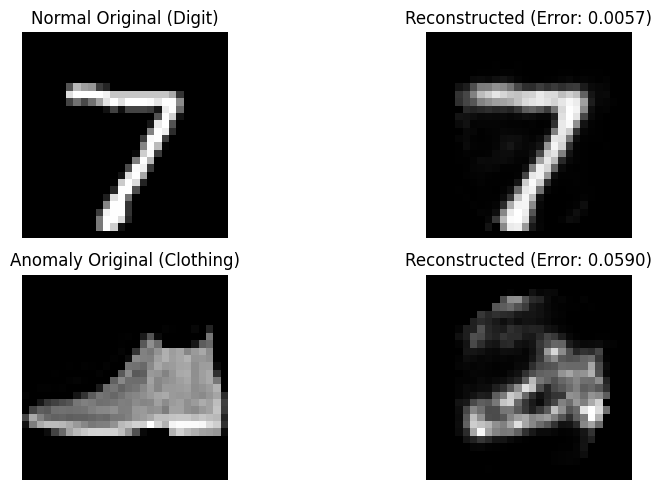

In [4]:
# 1. Select one normal image and one anomaly image
n = 0

# 2. Set up the plot
plt.figure(figsize=(10, 5))

# --- NORMAL DIGIT ---
# Original Normal
ax = plt.subplot(2, 2, 1)
plt.imshow(x_test_normal[n].reshape(28, 28), cmap='gray')
plt.title("Normal Original (Digit)")
plt.axis('off')

# Reconstructed Normal
ax = plt.subplot(2, 2, 2)
plt.imshow(reconstructed_normal[n].reshape(28, 28), cmap='gray')
plt.title(f"Reconstructed (Error: {mse_normal[n]:.4f})")
plt.axis('off')

# --- ANOMALY CLOTHING ---
# Original Anomaly
ax = plt.subplot(2, 2, 3)
plt.imshow(x_test_anomaly[n].reshape(28, 28), cmap='gray')
plt.title("Anomaly Original (Clothing)")
plt.axis('off')

# Reconstructed Anomaly
ax = plt.subplot(2, 2, 4)
plt.imshow(reconstructed_anomaly[n].reshape(28, 28), cmap='gray')
plt.title(f"Reconstructed (Error: {mse_anomaly[n]:.4f})")
plt.axis('off')

plt.tight_layout()
plt.show()